In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
car = pd.read_csv('quikr_car.csv')

In [3]:
car.sample(5)

,name,company,year,Price,kms_driven,fuel_type
299,Tata Indica V2 Xeta e GLE,Tata,2008,"1,50,000","11,000 kms",Petrol
205,Tata Sumo Victa EX 10 by 7 Str BSIII,Tata,2012,"2,85,000","65,000 kms",Diesel
107,Maruti Suzuki Ertiga Vxi,Maruti,2016,"5,75,000","29,000 kms",Petrol
201,Tata Nano Cx BSIV,Tata,2013,"40,000","2,200 kms",Petrol
190,Hyundai Santro Xing XS,Hyundai,2005,"49,000","7,500 kms",Petrol


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
car.shape

(892, 6)

In [6]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# Things to do
- remove all the categorical data in year column
- convert year into int
- remove the Ask For Price row in Price column
- remove all the commas in the Price column and convert into int
- remove the categorical data from kms_driven column 
- removing commas and kms in the kms_driven column and converting it into int
- only using first three words in the name column

In [7]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [9]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [11]:
dummy = car.copy()

# Removing the non numeric value and coverting the year column into integer

In [12]:
car = car[car['year'].str.isnumeric()]

In [13]:
car['year'] = car['year'].astype(int)

In [14]:
car.shape

(842, 6)

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


# Removing the non numeric value and coverting the Price column into integer

In [16]:
car = car[car['Price'] != 'Ask For Price']

In [17]:
car['Price'] = car['Price'].str.replace(',','')

In [18]:
car['Price'] = car['Price'].astype(int)

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


# Removing the non numeric value, kms and coverting the kms_driven column into integer

In [20]:
car['kms_driven'] = car['kms_driven'].str.replace(',','')

In [21]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0)

In [22]:
car = car[car['kms_driven'].str.isnumeric()]

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


# Using only first three words in the name column

In [24]:
car['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 817, dtype: object

In [25]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [26]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [27]:
car.dropna()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [28]:
car.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


- cleaned data has 815 rows 
- in cleaning of the data we lost 77 rows of data

In [29]:
car = car.dropna()

In [30]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [31]:
car.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [32]:
car.to_csv('cleaned_dat_car.csv')

- identifying the outliers

In [33]:
car = car[car['Price'] < 3.5e6] .reset_index(drop = True)

In [34]:
car[car['Price'] < 0]

,name,company,year,Price,kms_driven,fuel_type


In [35]:
car.shape

(815, 6)

# Spliting the data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = car.drop(columns = ['Price'])
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


<Axes: xlabel='company', ylabel='count'>

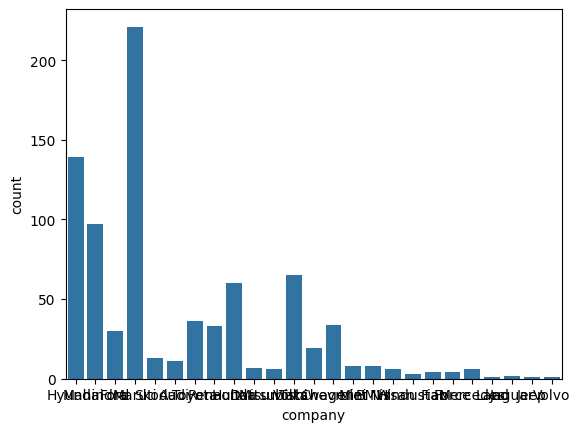

In [38]:
import seaborn as sns
sns.countplot(x='company', data=X)
# sns.distplot(X['company'])

In [39]:
Y = car['Price']
Y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

# Identifying which random state would give max accuracy/ r2_score

In [40]:
ohe = OneHotEncoder()

In [41]:
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [42]:
scores = []
for i in range(500):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = i)
    model2 = LinearRegression()
    temp_encoding = ColumnTransformer(transformers = [
    ('encoding',OneHotEncoder(categories = ohe.categories_),['name', 'company', 'fuel_type'])
    ],remainder = 'passthrough')
    temp_pipe = make_pipeline(temp_encoding,model2)
    temp_pipe.fit(x_train,y_train)
    y_pred = temp_pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [43]:
np.argmax(scores)

433

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state = np.argmax(scores))

In [45]:
x_train

,name,company,year,kms_driven,fuel_type
481,Maruti Suzuki Wagon,Maruti,2016,35500,Diesel
16,Mahindra Scorpio S10,Mahindra,2016,43000,Diesel
256,Maruti Suzuki Dzire,Maruti,2009,46000,Petrol
73,Honda Amaze,Honda,2015,22000,Petrol
720,Hindustan Motors Ambassador,Hindustan,1995,37000,Petrol
...,...,...,...,...,...
596,Toyota Innova 2.5,Toyota,2011,147000,Diesel
689,Toyota Fortuner 3.0,Toyota,2013,97000,Diesel
648,Maruti Suzuki Ertiga,Maruti,2012,200000,Diesel
607,Volkswagen Polo Trendline,Volkswagen,2015,25000,Diesel


# Model trainng 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [47]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [48]:
encoding = ColumnTransformer(transformers = [
    ('encoding',OneHotEncoder(categories = ohe.categories_),['name', 'company', 'fuel_type'])
],remainder = 'passthrough')

In [49]:
model = LinearRegression()

In [50]:
pipe = Pipeline([
    ('encoding',encoding),
    ('model',model)
])

In [51]:
pipe.fit(x_train,y_train)

c:\Users\manit\anaconda3\envs\ml\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevr...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [52]:
y_pred = pipe.predict(x_test)

In [53]:
y_pred

array([ 320001.65953541,  272906.66218245,  666666.35706593,
        479373.48926249,  344024.00746704,  336644.75527541,
        429554.06936552,  147138.78386771,   19786.79859184,
        718138.70700526,  490667.72609918,  533174.07378953,
        674791.2634378 ,   16076.0897458 ,  486371.27935959,
        244752.3766385 ,  259745.04790596,  394432.94687278,
        202157.20876504,  259179.46262573,  433896.84381214,
        384797.32086594,  347352.12878739,  367876.45628385,
        431566.58499774,  -52871.23768034,  427119.12635819,
        137597.78835844,  403908.27855157,   25285.17863054,
        538008.62468704,  306055.2879549 , 1157657.06589181,
        604964.45548801,  513152.09487991,  332007.19445127,
        114486.87722354, 1579577.7026923 ,  534436.48661359,
        195555.58044401,  348715.70203831, -182947.84317258,
        507778.36457187, 1874697.18293373,  268321.76550912,
        218184.31721562,  104778.09255639,  316131.75206199,
        204422.58308409,

In [54]:
r2_score(y_test,y_pred)

0.8457046438151008

In [55]:
import pickle

In [56]:
pickle.dump(pipe,open('Car_Predictor.pkl','wb'))

In [59]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2013,100,'Petrol']],columns = ['name','company','year','kms_driven','fuel_type']))

array([265010.46086743])